In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats
import plotly.express as px

# Télécharger les données journalières de Meta (remplacez "META_TICKER" par le ticker approprié)
META_TICKER = "META"
data = yf.download(META_TICKER, start="2020-01-01", end="2021-12-31")

# Sélectionner les colonnes "Adj Close" (prix ajusté en clôture) pour les prix
prices = data["Adj Close"]

# Calculer les rendements (variation des prix)
returns = prices.pct_change().dropna()


[*********************100%%**********************]  1 of 1 completed


In [3]:

# Test de stationnarité (test de Dickey-Fuller augmenté)
result = adfuller(returns)
print("Test de stationnarité (Dickey-Fuller Augmented):")
print(f"Statistique de test : {result[0]}")
print(f"Valeur critique à 1% : {result[4]['1%']}")
print(f"Valeur critique à 5% : {result[4]['5%']}")
print(f"Valeur critique à 10% : {result[4]['10%']}")
print(f"P-value : {result[1]}")
print("\nRésultat : Les données sont stationnaires (p-value < 0.05)" if result[1] < 0.05 else "Résultat : Les données ne sont pas stationnaires")


Test de stationnarité (Dickey-Fuller Augmented):
Statistique de test : -7.738105264277878
Valeur critique à 1% : -3.4436568932270095
Valeur critique à 5% : -2.8674084917497074
Valeur critique à 10% : -2.5698956806372832
P-value : 1.0800136223823828e-11

Résultat : Les données sont stationnaires (p-value < 0.05)


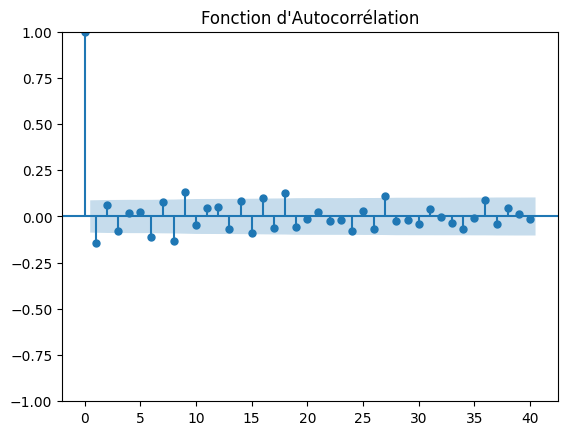

In [4]:
import matplotlib.pyplot as plt
# Test d'autocorrélation (fonction d'autocorrélation)
plot_acf(returns, lags=40)
plt.title("Fonction d'Autocorrélation")
plt.show()


In [5]:

# Test de normalité (test de Shapiro-Wilk)
result = stats.shapiro(returns)
print("Test de normalité (Shapiro-Wilk):")
print(f"Statistique de test : {result[0]}")
print(f"P-value : {result[1]}")
print("\nRésultat : Les données suivent une distribution normale (p-value > 0.05)" if result[1] > 0.05 else "Résultat : Les données ne suivent pas une distribution normale")


Test de normalité (Shapiro-Wilk):
Statistique de test : 0.9505829811096191
P-value : 6.370991841725404e-12
Résultat : Les données ne suivent pas une distribution normale


In [6]:

# Graphique des prix
fig = px.line(data, x=data.index, y="Adj Close", title=f"Prix de {META_TICKER}")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Prix")
fig.show()


c:\Users\maria\Documents\GitHub\Meta_analysis\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [7]:

# Graphique des rendements
fig = px.line(returns, x=returns.index, y=returns, title=f"Rendements de {META_TICKER}")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rendements")
fig.show()




c:\Users\maria\Documents\GitHub\Meta_analysis\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

